In [16]:
import requests
import json
import pandas as pd


parameters = {
   "beginDate" : "01/01/2014",
   "endDate" : "15/01/2024"}

parameters2 = {"granularity": "annual"}

url = "https://ec.europa.eu/agrifood/api/oliveOil/prices?"
url2 = "https://ec.europa.eu/agrifood/api/oliveOil/production?"

response = requests.get(url, params=parameters)
response.json()
df = pd.DataFrame.from_dict(response.json())


response2 = requests.get(url2, params=parameters2)
response2.json()
df2 = pd.DataFrame.from_dict(response2.json())

df = df.rename(columns={'memberStateName': 'country', 'beginDate': 'date', 'marketingYear': 'campaign'})
columns_to_remove = ['endDate']
df.drop(columns_to_remove, axis=1, inplace=True)
df = df.drop(["memberStateCode", "market", "weekNumber"], axis=1)

df2 = df2.rename(columns={'memberStateName': 'country', 'marketingYear': 'campaign', 'yearProductionQuantity':'production'})
columns_to_remove = ['memberStateCode','productionYear', 'endingStockQuantity']
df2.drop(columns_to_remove, axis=1, inplace=True)

to_drop=df2[df2["country"]=="Cyprus"].index
df2.drop(index=to_drop,inplace=True)
df2["country"].value_counts()

In [20]:
#1. What are the total olive oil price and production over the past 10 years?
#(price and time)

df2_production = df2.groupby("country").agg({"production":"sum"})
df2_production

,production
country,
Croatia,44.22
France,49.08
Greece,3133.50
Italy,3850.67
Malta,0.14
Portugal,1142.25
Slovenia,5.83
Spain,13786.11


In [21]:
df["price"] = df["price"].replace("[\€,]", "", regex=True).astype(float)
df_price = df.groupby(["country"]).agg({"price":"mean"}).round(2)
df_price

,price
country,
Croatia,737.20
France,1226.15
Greece,288.80
Italy,339.15
Malta,2911.20
Portugal,337.42
Slovenia,1810.96
Spain,279.54


In [22]:
df3 = pd.merge(df_price, df2_production, on="country", how= "inner")
df3

,price,production
country,,
Croatia,737.20,44.22
France,1226.15,49.08
Greece,288.80,3133.50
Italy,339.15,3850.67
Malta,2911.20,0.14
Portugal,337.42,1142.25
Slovenia,1810.96,5.83
Spain,279.54,13786.11


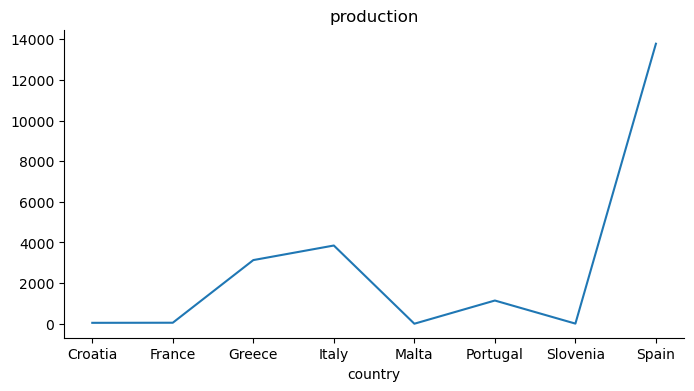

In [23]:
from matplotlib import pyplot as plt
df3['production'].plot(kind='line', figsize=(8, 4), title='production')
plt.gca().spines[['top', 'right']].set_visible(False)

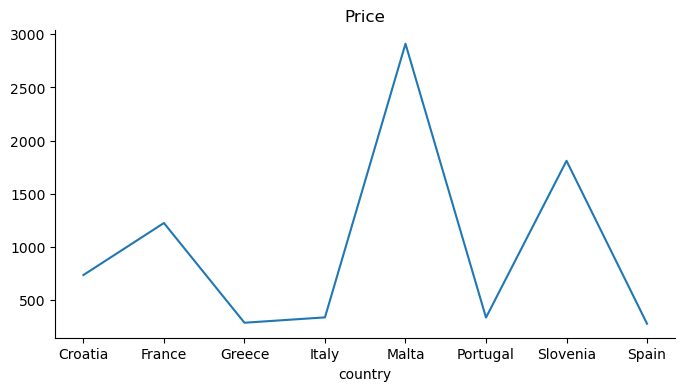

In [24]:
from matplotlib import pyplot as plt
df3['price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

In [25]:
#2.Which Member States are the major producers of olive oil?
#(countries and production)

df_max = df2.groupby(['country', 'campaign']).agg({'production':'max'})
df_max.sort_values(by= 'production', axis=0, ascending=False)

production
country campaign            
Spain   2018/19      1789.90
        2013/14      1775.80
        2021/22      1491.46
        2015/16      1397.90
        2020/21      1389.00
...                      ...
Malta   2013/14         0.04
        2012/13         0.04
        2015/16         0.04
        2014/15         0.02
France  2013/14         0.00

[86 rows x 1 columns]

In [26]:
#3. Which markets have the highest and lowest olive oil prices?(countries and prices)

df_sales = df.groupby(['country']).agg({'price':'max'})
df_sales.sort_values(by= 'price', axis=0, ascending=False)

,price
country,
Malta,2934.00
Slovenia,1845.00
Croatia,1566.89
France,1494.00
Italy,968.00
Spain,930.00
Greece,896.50
Portugal,880.00


In [27]:

#4. How has production evolved in these countries over time?
#(time, countries, production)

df_flut = df2.groupby(['campaign','country']).agg({'production':'sum'})
df_pivot = df2.pivot_table(index="country", columns= "campaign", values="production", aggfunc='sum')
df_pivot.T

country,Croatia,France,Greece,Italy,Malta,Portugal,Slovenia,Spain
campaign,,,,,,,,
2012/13,5.50,5.12,358.0,409.14,0.04,NaN,0.24,NaN
2013/14,5.00,0.00,132.0,461.24,0.04,91.65,0.60,1775.80
2014/15,1.17,1.90,295.0,222.00,0.02,64.15,0.21,837.60
2015/16,3.54,4.98,320.0,474.62,0.04,109.13,0.49,1397.90
2016/17,3.45,3.29,195.0,182.33,NaN,69.42,0.35,1286.60
2017/18,3.88,6.24,346.0,428.92,NaN,134.77,0.35,1260.10
2018/19,3.36,5.80,185.0,173.60,NaN,100.32,0.90,1789.90
2019/20,4.09,3.37,275.0,366.47,NaN,140.50,0.30,1125.28
2020/21,3.71,4.55,275.0,273.50,NaN,100.00,0.90,1389.00
